In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
vistas_raw = pd.read_csv('../data/datos_navent_fiuba/fiuba_3_vistas.csv')
postulaciones_raw = pd.read_csv('../data/datos_navent_fiuba/fiuba_4_postulaciones.csv')
avisos_raw = pd.read_csv('../data/datos_navent_fiuba/fiuba_6_avisos_detalle.csv')
generos_raw = pd.read_csv('../data/datos_navent_fiuba/fiuba_2_postulantes_genero_y_edad.csv')
educacion_raw = pd.read_csv('../data/datos_navent_fiuba/fiuba_1_postulantes_educacion.csv')

## Preguntas
* **Avisos con más vistas**
* **Avisos con más postulaciones**
* **Relación vistas/postulaciones para un mismo aviso**
* **Distribución horaria de avisos y postulaciones**
* **Distribución vistas por día y género**
* **Correlación usuario-postulaciones** - analizar si un mismo usuario se postula a avisos del mismo área o no

### Veo los df

In [3]:
vistas_raw.head(1)

,idAviso,timestamp,idpostulante
0,1111780242,2018-02-23T13:38:13.187-0500,YjVJQ6Z


In [4]:
postulaciones_raw.head(1)

,idaviso,idpostulante,fechapostulacion
0,1112257047,NM5M,2018-01-15 16:22:34


In [5]:
avisos_raw.head(1)

,idaviso,idpais,titulo,descripcion,nombre_zona,ciudad,mapacalle,tipo_de_trabajo,nivel_laboral,nombre_area,denominacion_empresa
0,8725750,1,VENDEDOR/A PROVINCIA DE SANTA FE,<p><strong><strong>Empresa:</strong></strong> ...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Comercial,VENTOR


In [6]:
generos_raw.head(1)

,idpostulante,fechanacimiento,sexo
0,NM5M,1970-12-03,FEM


In [7]:
educacion_raw.head(1)

,idpostulante,nombre,estado
0,NdJl,Posgrado,En Curso


### Limpieza y/o transformaciones

In [8]:
vistas = vistas_raw

In [9]:
postulaciones = postulaciones_raw

Unifico criterios de nombres de columnas
* timestamp        -> fecha  
* fechapostulacion -> fecha

In [10]:
vistas['timestamp'] = pd.to_datetime(vistas.timestamp)

In [11]:
vistas['fecha'] = pd.to_datetime(vistas.timestamp.dt.date)
vistas['hora'] = vistas.timestamp.dt.hour
vistas['min'] = vistas.timestamp.dt.minute
vistas['seg'] = vistas.timestamp.dt.second
#vistas.rename(columns={'timestamp':'fecha'}, inplace=True)


In [12]:
vistas.head(1)

,idAviso,timestamp,idpostulante,fecha,hora,min,seg
0,1111780242,2018-02-23 18:38:13.187,YjVJQ6Z,2018-02-23,18,38,13


In [13]:
vistas.dtypes

idAviso                  int64
timestamp       datetime64[ns]
idpostulante            object
fecha           datetime64[ns]
hora                     int64
min                      int64
seg                      int64
dtype: object

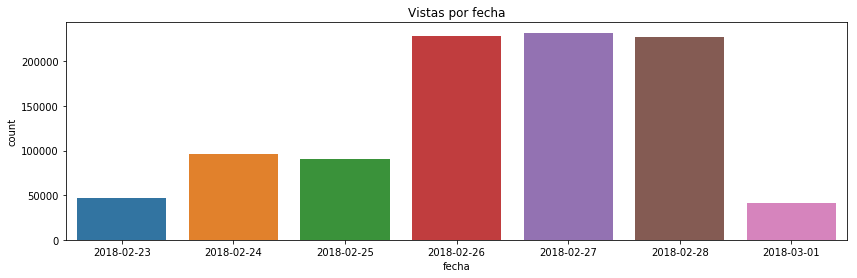

In [14]:
plt.figure(figsize=(14,4))
plt.title('Vistas por fecha')
sns.countplot(vistas.fecha.dt.date)
plt.show()

In [15]:
data = pd.merge(vistas, generos_raw, on='idpostulante')

In [16]:
data.head(1)

,idAviso,timestamp,idpostulante,fecha,hora,min,seg,fechanacimiento,sexo
0,1111780242,2018-02-23 18:38:13.187,YjVJQ6Z,2018-02-23,18,38,13,1991-11-16,MASC


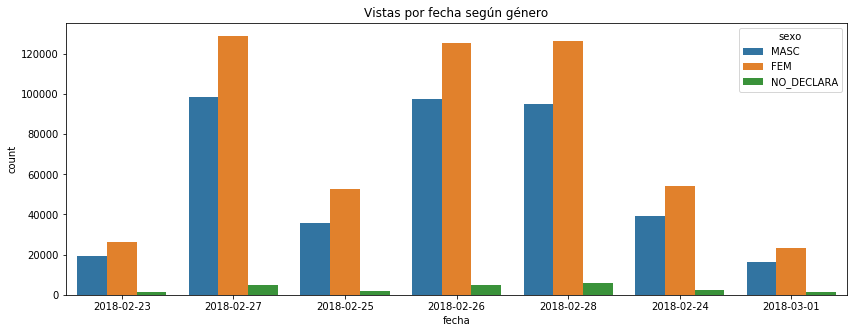

In [17]:
plt.figure(figsize=(14,5))
plt.title('Vistas por fecha según género')
sns.countplot(x=data.fecha.dt.date,hue='sexo',data=data)
plt.show()

In [ ]:
dias = ['lunes','martes','miércoles','jueve','viernes','sábado','domingo']
plt.figure(figsize=(14,5))
plt.title('Vistas por día de la semana según género')
sns.countplot(data.fecha.dt.dayofweek, data=data)
plt.xticks(data.fecha.dt.dayofweek,dias)
plt.show()

In [ ]:
postulaciones.rename(columns={'fechapostulacion':'fecha'}, inplace=True)

**vistas**

In [ ]:
vistas.info()

In [ ]:
vistas.head(1)

In [ ]:
# Veo que NO faltan datos pero debo transofrmar la columna timestamp en datetime

In [ ]:
vistas.fecha = pd.to_datetime(vistas.fecha)
vistas['hora'] = vistas.fecha.dt.time
vistas['fecha'] = vistas.fecha.dt.date

In [ ]:
vistas.dtypes

In [ ]:
vistas.head(3)

**postulaciones**

In [ ]:
postulaciones.info()

In [ ]:
postulaciones.head(1)

In [ ]:
postulaciones.fecha = pd.to_datetime(postulaciones.fecha)

In [ ]:
postulaciones.dtypes

In [ ]:
postulaciones.idpostulante.isna().any()

# Análisis

### Vistas

**Avisos con más vistas**

In [ ]:
data = vistas.idAviso.value_counts().value_counts()

In [ ]:
print('cant:',data.count(),'| min:',data.min(),'| max:',data.max())

In [ ]:
data.plot(kind='hist',
          bins=60, 
          logy=True,
          figsize=(14,4), 
          title='Distribución de vistas de publicaciones', 
          grid=True,
          xticks=[x for x in range(0,1200,20)],
          rot=75)
plt.xlabel('Cantidad de vistas')
plt.ylabel('Frecuencia')
plt.show()

Puede verse como la mayor cantidad de avisos tiene menos de 20 vistas

In [ ]:
data[data < 20].plot(kind='hist',
          bins=18,
          figsize=(14,4), 
          title='Distribución de vistas de publicaciones (menos de 20 vistas)', 
          grid=True,
          xticks=[x for x in range(0,20)])
plt.xlabel('Cantidad de vistas')
plt.ylabel('Frecuencia')
plt.show()

In [ ]:
data.plot(kind='kde', figsize=(14,4))
plt.show()

In [ ]:
vistas.idAviso.value_counts().head(50).plot(kind='bar', figsize=(12,5))
plt.show()

In [ ]:
data = vistas.idAviso.value_counts()

In [ ]:
(data.max()-data.min())

In [ ]:
data = vistas.idAviso.value_counts()
plt.figure(figsize=(14,6))
plt.title('Distribución')
plt.hist(data.head(5000), bins=20, density=True)
plt.xticks([x for x in range(0,4000,200)])
plt.grid(True)
plt.show()

In [ ]:
avisos = avisos_raw.rename(columns={'idaviso':'idAviso'})
avisos.head(1)

In [ ]:
top_vistas = vistas.idAviso.value_counts().head(10).reset_index().rename(columns={'idAviso':'count','index':'idAviso'})
top_vistas

In [ ]:
data = top_vistas.merge(avisos[['idAviso','titulo','nombre_area']], on='idAviso')
data

### Vistas por en el tiempo

In [ ]:
vistas.fecha.dt.time